# Car Price Prediction study

With the covid 19 impact in the market, we have seen lot of changes in car market. Further, somredicted which cae cars cars are in demand making them costly and some are not in demand making them cheaper.The machine learning model is to be created which can predict the car price based on different input parameters.

The entire data of used car available for sell is collected from cardekho.com using web scrapping tool selenium.

As the target(output) feature i.e. car price is continuous in nature it is a regression problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [112]:
data=pd.read_csv('finalcardetails1.csv')

In [113]:
df1=pd.DataFrame(data)

In [114]:
df1

Unnamed: 0              car_details variant used_kilometer    fuel  \
0              0        2008 Maruti Swift  Manual     73,000 kms  Petrol   
1              1         2011 Hyundai i20  Manual     70,000 kms  Petrol   
2              2    2015 Mahindra TUV 300  Manual     67,000 kms  Diesel   
3              3     2014 Mahindra XUV500  Manual     90,000 kms  Diesel   
4              4         2013 Skoda Rapid  Manual     63,000 kms  Diesel   
...          ...                      ...     ...            ...     ...   
5086         217  2012 Tata Safari Storme  Manual   1,24,009 kms  Diesel   
5087         218       2017 Maruti Baleno  Manual      5,000 kms  Petrol   
5088         219          2020 Tata Tiago  Manual     55,000 kms  Petrol   
5089         220       2013 Toyota Innova  Manual     80,000 kms  Diesel   
5090         221        2017 Jeep Compass  Manual     59,000 kms  Diesel   

             owner location      Price  
0     Second Owner   Mumbai  2.15 Lakh  
1      First Owner   Mumbai  3.15 Lakh  
2      First Owner   Mumbai  7.15 Lakh  
3      First Owner   Mumbai  7.95 Lakh  
4     Second Owner   Mumbai  3.95 Lakh  
...            ...      ...        ...  
5086   First Owner     Kota   4.7 Lakh  
5087   First Owner     Kota   5.5 Lakh  
5088  Second Owner     Kota   3.8 Lakh  
5089   First Owner     Kota  7.25 Lakh  
5090  Second Owner     Kota  10.5 Lakh  

[5091 rows x 8 columns]

In [115]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [116]:
df1

car_details variant used_kilometer    fuel         owner  \
0           2008 Maruti Swift  Manual     73,000 kms  Petrol  Second Owner   
1            2011 Hyundai i20  Manual     70,000 kms  Petrol   First Owner   
2       2015 Mahindra TUV 300  Manual     67,000 kms  Diesel   First Owner   
3        2014 Mahindra XUV500  Manual     90,000 kms  Diesel   First Owner   
4            2013 Skoda Rapid  Manual     63,000 kms  Diesel  Second Owner   
...                       ...     ...            ...     ...           ...   
5086  2012 Tata Safari Storme  Manual   1,24,009 kms  Diesel   First Owner   
5087       2017 Maruti Baleno  Manual      5,000 kms  Petrol   First Owner   
5088          2020 Tata Tiago  Manual     55,000 kms  Petrol  Second Owner   
5089       2013 Toyota Innova  Manual     80,000 kms  Diesel   First Owner   
5090        2017 Jeep Compass  Manual     59,000 kms  Diesel  Second Owner   

     location      Price  
0      Mumbai  2.15 Lakh  
1      Mumbai  3.15 Lakh  
2      Mumbai  7.15 Lakh  
3      Mumbai  7.95 Lakh  
4      Mumbai  3.95 Lakh  
...       ...        ...  
5086     Kota   4.7 Lakh  
5087     Kota   5.5 Lakh  
5088     Kota   3.8 Lakh  
5089     Kota  7.25 Lakh  
5090     Kota  10.5 Lakh  

[5091 rows x 7 columns]

In [117]:
df1.shape

(5091, 7)

The dataset is having 5091 records and 7 features.
The target(output) feature is Price.

In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   car_details     5091 non-null   object
 1   variant         5091 non-null   object
 2   used_kilometer  5091 non-null   object
 3   fuel            5091 non-null   object
 4   owner           5091 non-null   object
 5   location        5091 non-null   object
 6   Price           5091 non-null   object
dtypes: object(7)
memory usage: 278.5+ KB


The features are having object datatype.

The target(output) feature is car price  which is to be converted into float datatype as the values are continuous in nature.

In [119]:
df1.isnull().sum()

car_details       0
variant           0
used_kilometer    0
fuel              0
owner             0
location          0
Price             0
dtype: int64

There are no null values present in the dataset.

<AxesSubplot:>

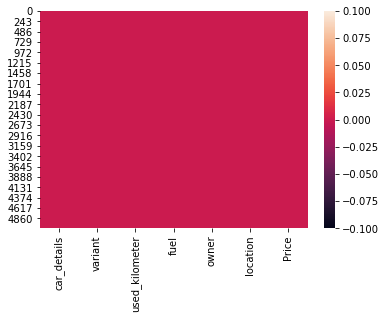

In [120]:
sns.heatmap(df1.isnull())

From the heatmap it can be said there are no null values present in the dataset.

# Data Pre-processing stage

In [121]:
df2=df1.copy()

In [122]:
df2['Brand']=df2['car_details'].str.split(' ').str[1]

Extracting out the new feature named as Brand from existing feature named as car_details.

In [123]:
df2['model']=df2['car_details'].str.split(' ').str[2]

Extracting out the new feature named as model from existing feature named as car_details.

In [124]:
df2['manufacturing year']=df2['car_details'].str.split(' ').str[0]

Extracting out the new feature named as car manufacturing year from existing feature named as car_details.

In [125]:
df2.drop('car_details',axis=1,inplace=True)

In [126]:
df2

variant used_kilometer    fuel         owner location      Price  \
0     Manual     73,000 kms  Petrol  Second Owner   Mumbai  2.15 Lakh   
1     Manual     70,000 kms  Petrol   First Owner   Mumbai  3.15 Lakh   
2     Manual     67,000 kms  Diesel   First Owner   Mumbai  7.15 Lakh   
3     Manual     90,000 kms  Diesel   First Owner   Mumbai  7.95 Lakh   
4     Manual     63,000 kms  Diesel  Second Owner   Mumbai  3.95 Lakh   
...      ...            ...     ...           ...      ...        ...   
5086  Manual   1,24,009 kms  Diesel   First Owner     Kota   4.7 Lakh   
5087  Manual      5,000 kms  Petrol   First Owner     Kota   5.5 Lakh   
5088  Manual     55,000 kms  Petrol  Second Owner     Kota   3.8 Lakh   
5089  Manual     80,000 kms  Diesel   First Owner     Kota  7.25 Lakh   
5090  Manual     59,000 kms  Diesel  Second Owner     Kota  10.5 Lakh   

         Brand    model manufacturing year  
0       Maruti    Swift               2008  
1      Hyundai      i20               2011  
2     Mahindra      TUV               2015  
3     Mahindra   XUV500               2014  
4        Skoda    Rapid               2013  
...        ...      ...                ...  
5086      Tata   Safari               2012  
5087    Maruti   Baleno               2017  
5088      Tata    Tiago               2020  
5089    Toyota   Innova               2013  
5090      Jeep  Compass               2017  

[5091 rows x 9 columns]

In [127]:
df2['driven_kilometers']=df2['used_kilometer'].str.split(' ').str[0]

In [128]:
df2

variant used_kilometer    fuel         owner location      Price  \
0     Manual     73,000 kms  Petrol  Second Owner   Mumbai  2.15 Lakh   
1     Manual     70,000 kms  Petrol   First Owner   Mumbai  3.15 Lakh   
2     Manual     67,000 kms  Diesel   First Owner   Mumbai  7.15 Lakh   
3     Manual     90,000 kms  Diesel   First Owner   Mumbai  7.95 Lakh   
4     Manual     63,000 kms  Diesel  Second Owner   Mumbai  3.95 Lakh   
...      ...            ...     ...           ...      ...        ...   
5086  Manual   1,24,009 kms  Diesel   First Owner     Kota   4.7 Lakh   
5087  Manual      5,000 kms  Petrol   First Owner     Kota   5.5 Lakh   
5088  Manual     55,000 kms  Petrol  Second Owner     Kota   3.8 Lakh   
5089  Manual     80,000 kms  Diesel   First Owner     Kota  7.25 Lakh   
5090  Manual     59,000 kms  Diesel  Second Owner     Kota  10.5 Lakh   

         Brand    model manufacturing year driven_kilometers  
0       Maruti    Swift               2008            73,000  
1      Hyundai      i20               2011            70,000  
2     Mahindra      TUV               2015            67,000  
3     Mahindra   XUV500               2014            90,000  
4        Skoda    Rapid               2013            63,000  
...        ...      ...                ...               ...  
5086      Tata   Safari               2012          1,24,009  
5087    Maruti   Baleno               2017             5,000  
5088      Tata    Tiago               2020            55,000  
5089    Toyota   Innova               2013            80,000  
5090      Jeep  Compass               2017            59,000  

[5091 rows x 10 columns]

Extracting out the new feature named as driven_kilometers from existing feature named as used_kilometer.

In [129]:
df2.dtypes

variant               object
used_kilometer        object
fuel                  object
owner                 object
location              object
Price                 object
Brand                 object
model                 object
manufacturing year    object
driven_kilometers     object
dtype: object

The feature driven_kilometer is having object datatype it has to be converted into float datatype as the kilometer is always a numerical value.

In [130]:
df2['driven_kilometers']=df2['driven_kilometers'].apply(lambda x:' '.join(term for term in x.split(',')))

In [131]:
df2['driven_kilometers']=df2['driven_kilometers'].apply(lambda x:''.join(term for term in x.split()))

In [132]:
df2['driven_kilometers']=df2['driven_kilometers'].astype('int')

In [133]:
df2['driven_kilometers'].dtype

dtype('int32')

The feature driven_kilometers is converted into integer datatype

In [134]:
df2.drop('used_kilometer',axis=1,inplace=True)

In [135]:
df2

variant    fuel         owner location      Price     Brand    model  \
0     Manual  Petrol  Second Owner   Mumbai  2.15 Lakh    Maruti    Swift   
1     Manual  Petrol   First Owner   Mumbai  3.15 Lakh   Hyundai      i20   
2     Manual  Diesel   First Owner   Mumbai  7.15 Lakh  Mahindra      TUV   
3     Manual  Diesel   First Owner   Mumbai  7.95 Lakh  Mahindra   XUV500   
4     Manual  Diesel  Second Owner   Mumbai  3.95 Lakh     Skoda    Rapid   
...      ...     ...           ...      ...        ...       ...      ...   
5086  Manual  Diesel   First Owner     Kota   4.7 Lakh      Tata   Safari   
5087  Manual  Petrol   First Owner     Kota   5.5 Lakh    Maruti   Baleno   
5088  Manual  Petrol  Second Owner     Kota   3.8 Lakh      Tata    Tiago   
5089  Manual  Diesel   First Owner     Kota  7.25 Lakh    Toyota   Innova   
5090  Manual  Diesel  Second Owner     Kota  10.5 Lakh      Jeep  Compass   

     manufacturing year  driven_kilometers  
0                  2008              73000  
1                  2011              70000  
2                  2015              67000  
3                  2014              90000  
4                  2013              63000  
...                 ...                ...  
5086               2012             124009  
5087               2017               5000  
5088               2020              55000  
5089               2013              80000  
5090               2017              59000  

[5091 rows x 9 columns]

In [136]:
df2['owners']=df2['owner'].str.split().str[0]

In [137]:
df2

variant    fuel         owner location      Price     Brand    model  \
0     Manual  Petrol  Second Owner   Mumbai  2.15 Lakh    Maruti    Swift   
1     Manual  Petrol   First Owner   Mumbai  3.15 Lakh   Hyundai      i20   
2     Manual  Diesel   First Owner   Mumbai  7.15 Lakh  Mahindra      TUV   
3     Manual  Diesel   First Owner   Mumbai  7.95 Lakh  Mahindra   XUV500   
4     Manual  Diesel  Second Owner   Mumbai  3.95 Lakh     Skoda    Rapid   
...      ...     ...           ...      ...        ...       ...      ...   
5086  Manual  Diesel   First Owner     Kota   4.7 Lakh      Tata   Safari   
5087  Manual  Petrol   First Owner     Kota   5.5 Lakh    Maruti   Baleno   
5088  Manual  Petrol  Second Owner     Kota   3.8 Lakh      Tata    Tiago   
5089  Manual  Diesel   First Owner     Kota  7.25 Lakh    Toyota   Innova   
5090  Manual  Diesel  Second Owner     Kota  10.5 Lakh      Jeep  Compass   

     manufacturing year  driven_kilometers  owners  
0                  2008              73000  Second  
1                  2011              70000   First  
2                  2015              67000   First  
3                  2014              90000   First  
4                  2013              63000  Second  
...                 ...                ...     ...  
5086               2012             124009   First  
5087               2017               5000   First  
5088               2020              55000  Second  
5089               2013              80000   First  
5090               2017              59000  Second  

[5091 rows x 10 columns]

In [138]:
df2.drop('owner',axis=1,inplace=True)

In [139]:
df2

variant    fuel location      Price     Brand    model  \
0     Manual  Petrol   Mumbai  2.15 Lakh    Maruti    Swift   
1     Manual  Petrol   Mumbai  3.15 Lakh   Hyundai      i20   
2     Manual  Diesel   Mumbai  7.15 Lakh  Mahindra      TUV   
3     Manual  Diesel   Mumbai  7.95 Lakh  Mahindra   XUV500   
4     Manual  Diesel   Mumbai  3.95 Lakh     Skoda    Rapid   
...      ...     ...      ...        ...       ...      ...   
5086  Manual  Diesel     Kota   4.7 Lakh      Tata   Safari   
5087  Manual  Petrol     Kota   5.5 Lakh    Maruti   Baleno   
5088  Manual  Petrol     Kota   3.8 Lakh      Tata    Tiago   
5089  Manual  Diesel     Kota  7.25 Lakh    Toyota   Innova   
5090  Manual  Diesel     Kota  10.5 Lakh      Jeep  Compass   

     manufacturing year  driven_kilometers  owners  
0                  2008              73000  Second  
1                  2011              70000   First  
2                  2015              67000   First  
3                  2014              90000   First  
4                  2013              63000  Second  
...                 ...                ...     ...  
5086               2012             124009   First  
5087               2017               5000   First  
5088               2020              55000  Second  
5089               2013              80000   First  
5090               2017              59000  Second  

[5091 rows x 9 columns]

In [140]:
df2['car_price']=df2['Price'].str.split().str[0]

The feature Price is having object datatype it has to be converted into float/integer datatype as car price is always a numerical value.

In [141]:
df2['car_price']=df2['car_price'].astype('float')

The feature car_price is converted into float datatype

In [143]:
df2.drop('Price',axis=1,inplace=True)

In [144]:
df2

variant    fuel location     Brand    model manufacturing year  \
0     Manual  Petrol   Mumbai    Maruti    Swift               2008   
1     Manual  Petrol   Mumbai   Hyundai      i20               2011   
2     Manual  Diesel   Mumbai  Mahindra      TUV               2015   
3     Manual  Diesel   Mumbai  Mahindra   XUV500               2014   
4     Manual  Diesel   Mumbai     Skoda    Rapid               2013   
...      ...     ...      ...       ...      ...                ...   
5086  Manual  Diesel     Kota      Tata   Safari               2012   
5087  Manual  Petrol     Kota    Maruti   Baleno               2017   
5088  Manual  Petrol     Kota      Tata    Tiago               2020   
5089  Manual  Diesel     Kota    Toyota   Innova               2013   
5090  Manual  Diesel     Kota      Jeep  Compass               2017   

      driven_kilometers  owners  car_price  
0                 73000  Second       2.15  
1                 70000   First       3.15  
2                 67000   First       7.15  
3                 90000   First       7.95  
4                 63000  Second       3.95  
...                 ...     ...        ...  
5086             124009   First       4.70  
5087               5000   First       5.50  
5088              55000  Second       3.80  
5089              80000   First       7.25  
5090              59000  Second      10.50  

[5091 rows x 9 columns]

In [145]:
df2['variant'].value_counts()

Manual       4085
Automatic    1006
Name: variant, dtype: int64

<AxesSubplot:xlabel='variant', ylabel='count'>

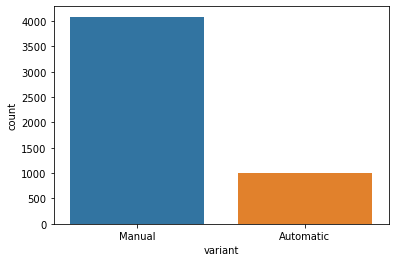

In [146]:
sns.countplot(x='variant',data=df2)

As per the dataset 80%(4085 out of 5091) of the records are having manual transmission pertaining to used cars available for sale.

In [35]:
df2.drop('Price',axis=1,inplace=True)

In [36]:
df2

variant    fuel location     Brand    model manufacturing year  \
0     Manual  Petrol   Mumbai    Maruti    Swift               2008   
1     Manual  Petrol   Mumbai   Hyundai      i20               2011   
2     Manual  Diesel   Mumbai  Mahindra      TUV               2015   
3     Manual  Diesel   Mumbai  Mahindra   XUV500               2014   
4     Manual  Diesel   Mumbai     Skoda    Rapid               2013   
...      ...     ...      ...       ...      ...                ...   
5086  Manual  Diesel     Kota      Tata   Safari               2012   
5087  Manual  Petrol     Kota    Maruti   Baleno               2017   
5088  Manual  Petrol     Kota      Tata    Tiago               2020   
5089  Manual  Diesel     Kota    Toyota   Innova               2013   
5090  Manual  Diesel     Kota      Jeep  Compass               2017   

      driven_kilometers  owners  car_price  
0                 73000  Second       2.15  
1                 70000   First       3.15  
2                 67000   First       7.15  
3                 90000   First       7.95  
4                 63000  Second       3.95  
...                 ...     ...        ...  
5086             124009   First       4.70  
5087               5000   First       5.50  
5088              55000  Second       3.80  
5089              80000   First       7.25  
5090              59000  Second      10.50  

[5091 rows x 9 columns]

In [37]:
df2['variant'].value_counts()

Manual       4085
Automatic    1006
Name: variant, dtype: int64

 As per the dataset 80%(4085 out of 5091) of the records are having manual transmission pertaining to used cars available for sell.

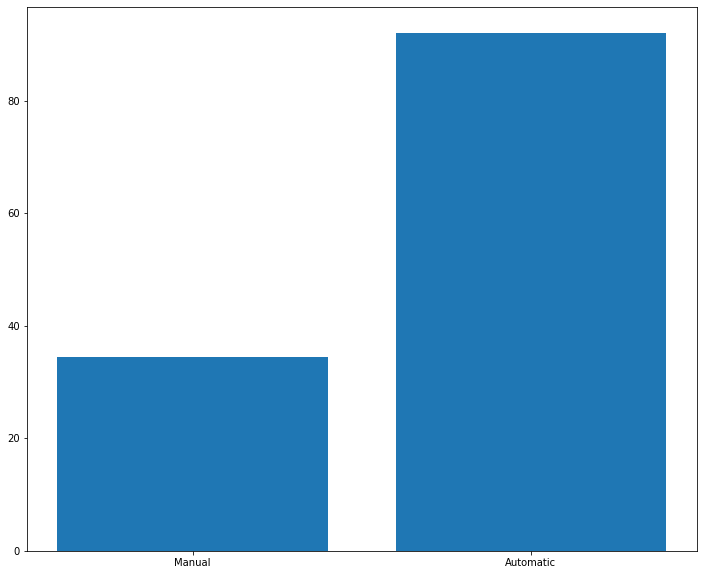

In [149]:
plt.figure(figsize=[12,10])
plt.bar(df2['variant'],df2['car_price'])
plt.show()

In [150]:
pd.crosstab(df2['variant'],df2['car_price'],margins=True)

car_price  0.3  0.32  0.4  0.44  0.48  0.5  0.55  0.6  0.63  0.65  ...  65.0  \
variant                                                            ...         
Automatic    0     0    0     0     0    0     0    0     0     0  ...     2   
Manual       1     1    3     1     1    3     2    3     1     4  ...     0   
All          1     1    3     1     1    3     2    3     1     4  ...     2   

car_price  74.75  75.0  75.75  77.0  78.0  85.0  91.0  92.0   All  
variant                                                            
Automatic      1     1      1     2     2     2     1     1  1006  
Manual         0     0      0     0     0     0     0     0  4085  
All            1     1      1     2     2     2     1     1  5091  

[3 rows x 895 columns]

From the above it can be said the cars having automatic transmission are costly as compared to the one's having manual transmission

In [152]:
df2['fuel'].value_counts()

Petrol    2565
Diesel    2448
CNG         56
LPG         22
Name: fuel, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='count'>

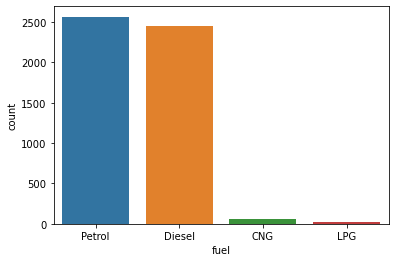

In [153]:
sns.countplot(x='fuel',data=df2)

Most the used cars available for sale are running on petrol and diesel.Further,0.01%(52 out of 5091)cars are running on CNG and 0.0003%(22 out of 5091) are running on LPG. 

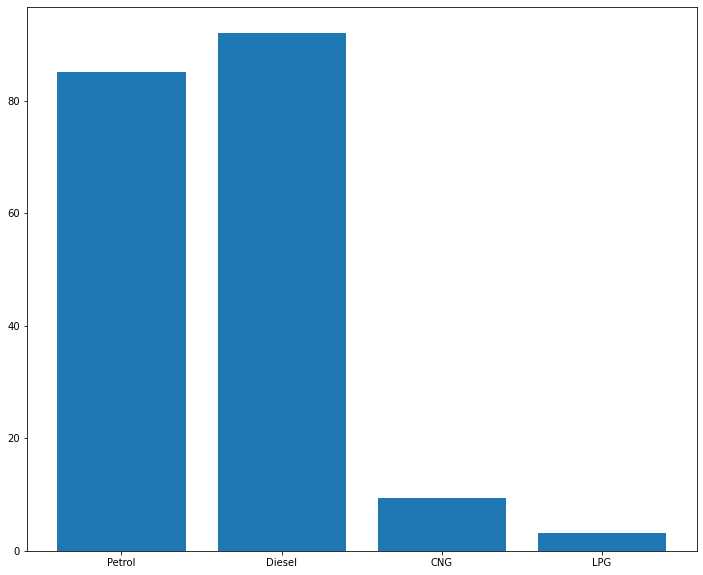

In [155]:
plt.figure(figsize=[12,10])
plt.bar(df2['fuel'],df2['car_price'])
plt.show()

In [156]:
pd.crosstab(df2['fuel'],df2['car_price'],margins=True)

car_price  0.3  0.32  0.4  0.44  0.48  0.5  0.55  0.6  0.63  0.65  ...  65.0  \
fuel                                                               ...         
CNG          0     0    0     0     0    0     0    0     0     0  ...     0   
Diesel       0     0    0     0     0    0     1    1     1     0  ...     2   
LPG          0     0    0     0     0    0     0    0     0     0  ...     0   
Petrol       1     1    3     1     1    3     1    2     0     4  ...     0   
All          1     1    3     1     1    3     2    3     1     4  ...     2   

car_price  74.75  75.0  75.75  77.0  78.0  85.0  91.0  92.0   All  
fuel                                                               
CNG            0     0      0     0     0     0     0     0    56  
Diesel         0     1      1     0     2     0     1     1  2448  
LPG            0     0      0     0     0     0     0     0    22  
Petrol         1     0      0     2     0     2     0     0  2565  
All            1     1      1     2     2     2     1     1  5091  

[5 rows x 895 columns]

The cars running on diesel are found to be costlier as compared to cars running on petrol.

In [157]:
df2['location'].value_counts()

Banglore      980
Ahmedabad     960
Jaipur        646
Pune          436
Nagpur        414
Indore        335
Thane         310
Patna         293
Kota          222
Udaipur       209
Chandigarh    122
Ranchi        110
Mumbai         54
Name: location, dtype: int64

The maximum records extracted for the used cars avaialble for selling are for Bangalore and Ahmedabad.

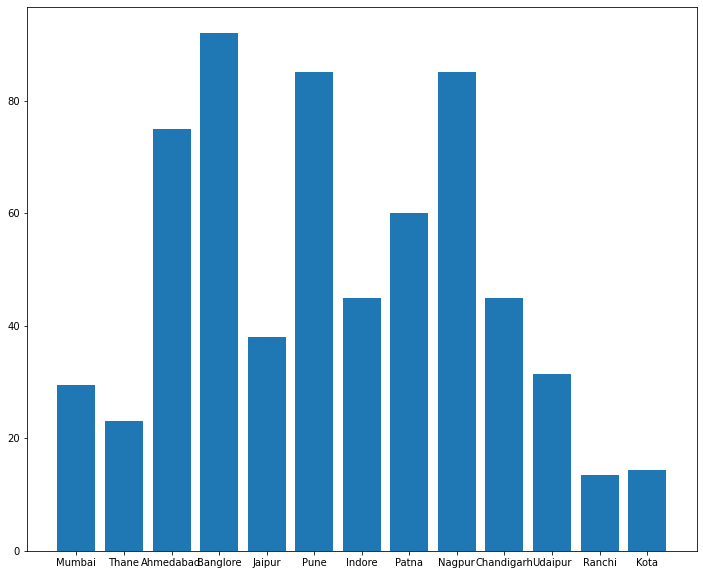

In [158]:
plt.figure(figsize=[12,10])
plt.bar(df2['location'],df2['car_price'])
plt.show()

In [159]:
pd.crosstab(df2['location'],df2['car_price'],margins=True)

car_price   0.3  0.32  0.4  0.44  0.48  0.5  0.55  0.6  0.63  0.65  ...  65.0  \
location                                                            ...         
Ahmedabad     0     0    0     0     0    0     2    0     1     1  ...     2   
Banglore      0     0    0     0     0    0     0    0     0     0  ...     0   
Chandigarh    0     0    0     0     0    0     0    0     0     0  ...     0   
Indore        0     0    0     0     0    0     0    1     0     2  ...     0   
Jaipur        0     0    0     0     0    0     0    1     0     0  ...     0   
Kota          0     0    0     0     0    0     0    0     0     0  ...     0   
Mumbai        0     0    0     0     0    0     0    0     0     0  ...     0   
Nagpur        0     0    0     0     0    0     0    1     0     0  ...     0   
Patna         0     1    2     1     0    1     0    0     0     0  ...     0   
Pune          0     0    0     0     0    0     0    0     0     1  ...     0   
Ranchi        1     0    1     0     1    0     0    0     0     0  ...     0   
Thane         0     0    0     0     0    0     0    0     0     0  ...     0   
Udaipur       0     0    0     0     0    2     0    0     0     0  ...     0   
All           1     1    3     1     1    3     2    3     1     4  ...     2   

car_price   74.75  75.0  75.75  77.0  78.0  85.0  91.0  92.0   All  
location                                                            
Ahmedabad       0     1      0     0     0     0     0     0   960  
Banglore        1     0      1     0     0     0     1     1   980  
Chandigarh      0     0      0     0     0     0     0     0   122  
Indore          0     0      0     0     0     0     0     0   335  
Jaipur          0     0      0     0     0     0     0     0   646  
Kota            0     0      0     0     0     0     0     0   222  
Mumbai          0     0      0     0     0     0     0     0    54  
Nagpur          0     0      0     1     1     1     0     0   414  
Patna           0     0      0     0     0     0     0     0   293  
Pune            0     0      0     1     1     1     0     0   436  
Ranchi          0     0      0     0     0     0     0     0   110  
Thane           0     0      0     0     0     0     0     0   310  
Udaipur         0     0      0     0     0     0     0     0   209  
All             1     1      1     2     2     2     1     1  5091  

[14 rows x 895 columns]

Out of all the locations,Bangalore is costly when it comes to used cars  available for sale

In [161]:
df2['Brand'].value_counts()

Maruti           1557
Hyundai           984
Honda             392
Mahindra          337
Ford              271
Toyota            254
Volkswagen        199
Tata              192
Renault           188
Skoda             108
Mercedes-Benz      96
BMW                96
Chevrolet          87
Audi               86
Nissan             51
Fiat               35
Datsun             28
Land               23
Kia                22
Volvo              20
Jeep               17
Jaguar             15
Mitsubishi         12
MG                  8
Porsche             4
Mini                3
Force               3
Lexus               1
Premier             1
Bentley             1
Name: Brand, dtype: int64

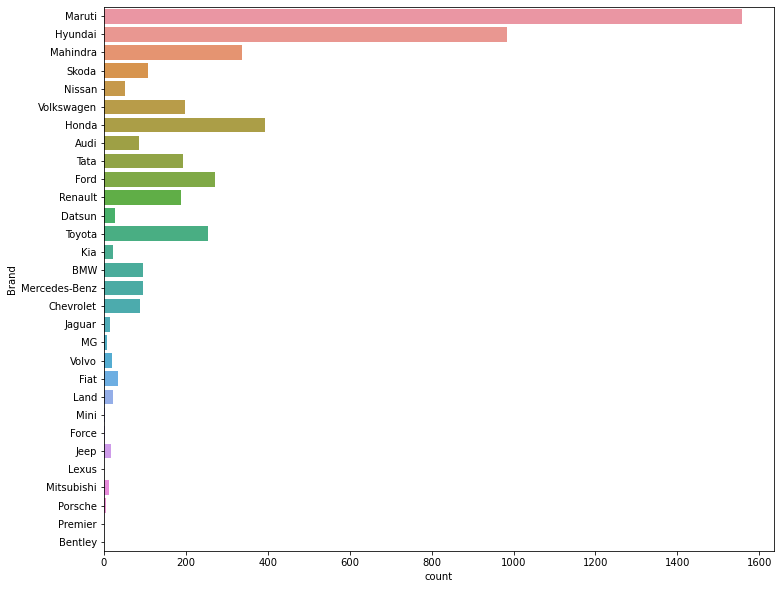

In [165]:
plt.figure(figsize=[12,10])
sns.countplot(y='Brand',data=df2)
plt.show()

Most of the used cars available for sale are for Maruti brand and the least are for Lexus, Bentley etc. Further, the premium Brand cars like Lexus, Bentley are costlier and it is not afforable by many to buy the same.
The brands like Maruti, Hyundai etc cars are afforable by many as they are cheaper compared to other premium brands and hence there are many buyers for this cars.

In [169]:
pd.set_option('display.max_rows',None)
df2['model'].value_counts()

Swift          446
Alto           284
Grand          246
i20            205
Wagon          205
City           133
Baleno         121
Innova         121
i10            113
Verna          112
KWID           109
Figo           103
XUV500         101
Polo            99
Scorpio         99
Amaze           92
Ecosport        84
EON             78
Ciaz            77
Vitara          69
Creta           68
Santro          66
Ertiga          63
Celerio         62
Vento           61
Jazz            57
Etios           50
Duster          50
Brio            47
Rapid           46
Fortuner        44
SX4             42
Ritz            42
Bolero          37
Eeco            36
Xcent           36
Endeavour       34
3               32
Indigo          30
New             30
Fiesta          29
Omni            29
Tiago           28
Zen             27
Indica          26
Corolla         26
Beat            25
Superb          24
5               23
Micra           23
Rover           23
E-Class         23
Q3          

The maximum records i.e 8.7%(446 out of 5091)for the cars available for selling are for Maruti brand and that too Maruti Swift model.

In [171]:
df2['manufacturing year'].value_counts()

2017    621
2018    556
2015    542
2016    542
2014    451
2013    418
2012    408
2011    352
2019    316
2010    259
2009    159
2020    143
2008    115
2007     88
2006     41
2021     28
2005     17
2004     10
2003      9
2002      3
1998      3
2000      3
1997      3
2001      2
1999      2
Name: manufacturing year, dtype: int64

The maximum records are for the car that have been manufacture in the year 2017 followed by 2018 and the least are for 1999 and 2001.

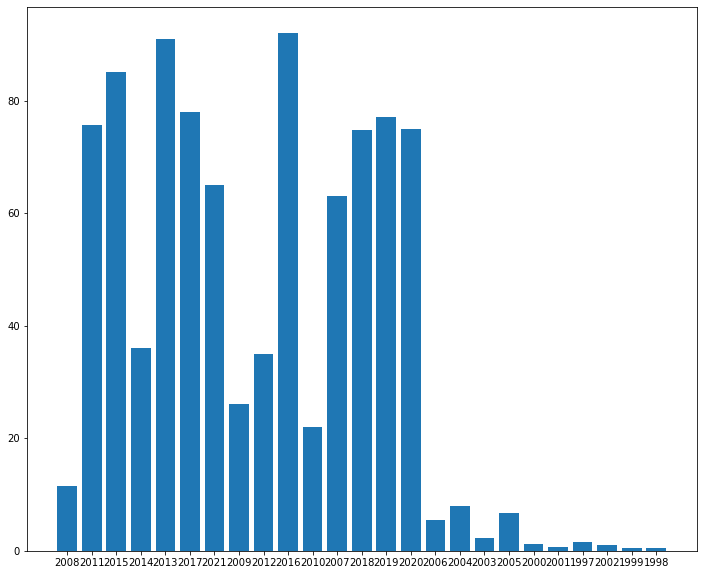

In [172]:
plt.figure(figsize=[12,10])
plt.bar(df2['manufacturing year'],df2['car_price'])
plt.show()

In [173]:
pd.crosstab(df2['manufacturing year'],df2['car_price'],margins=True)

car_price           0.3  0.32  0.4  0.44  0.48  0.5  0.55  0.6  0.63  0.65  \
manufacturing year                                                           
1997                  0     0    0     0     0    0     0    1     0     0   
1998                  0     0    1     0     0    2     0    0     0     0   
1999                  0     1    0     1     0    0     0    0     0     0   
2000                  0     0    1     0     0    0     0    0     0     0   
2001                  0     0    0     0     0    0     0    0     0     0   
2002                  1     0    0     0     0    0     0    0     0     0   
2003                  0     0    0     0     0    0     0    0     0     1   
2004                  0     0    0     0     1    0     0    0     0     0   
2005                  0     0    0     0     0    1     1    1     0     1   
2006                  0     0    0     0     0    0     0    0     1     0   
2007                  0     0    1     0     0    0     0    0     0     1   
2008                  0     0    0     0     0    0     0    0     0     0   
2009                  0     0    0     0     0    0     0    0     0     0   
2010                  0     0    0     0     0    0     0    0     0     1   
2011                  0     0    0     0     0    0     1    1     0     0   
2012                  0     0    0     0     0    0     0    0     0     0   
2013                  0     0    0     0     0    0     0    0     0     0   
2014                  0     0    0     0     0    0     0    0     0     0   
2015                  0     0    0     0     0    0     0    0     0     0   
2016                  0     0    0     0     0    0     0    0     0     0   
2017                  0     0    0     0     0    0     0    0     0     0   
2018                  0     0    0     0     0    0     0    0     0     0   
2019                  0     0    0     0     0    0     0    0     0     0   
2020                  0     0    0     0     0    0     0    0     0     0   
2021                  0     0    0     0     0    0     0    0     0     0   
All                   1     1    3     1     1    3     2    3     1     4   

car_price           ...  65.0  74.75  75.0  75.75  77.0  78.0  85.0  91.0  \
manufacturing year  ...                                                     
1997                ...     0      0     0      0     0     0     0     0   
1998                ...     0      0     0      0     0     0     0     0   
1999                ...     0      0     0      0     0     0     0     0   
2000                ...     0      0     0      0     0     0     0     0   
2001                ...     0      0     0      0     0     0     0     0   
2002                ...     0      0     0      0     0     0     0     0   
2003                ...     0      0     0      0     0     0     0     0   
2004                ...     0      0     0      0     0     0     0     0   
2005                ...     0      0     0      0     0     0     0     0   
2006                ...     0      0     0      0     0     0     0     0   
2007                ...     0      0     0      0     0     0     0     0   
2008                ...     0      0     0      0     0     0     0     0   
2009                ...     0      0     0      0     0     0     0     0   
2010                ...     0      0     0      0     0     0     0     0   
2011                ...     0      0     0      1     0     0     0     0   
2012                ...     0      0     0      0     0     0     0     0   
2013                ...     0      0     0      0     0     0     0     1   
2014                ...     0      0     0      0     0     0     0     0   
2015                ...     0      0     0      0     0     0     2     0   
2016                ...     0      0     0      0     0     0     0     0   
2017                ...     0      0     0      0     0     2     0     0   
2018                ...     1      1     0  

The cars which are maufactured in the year from 1997 to 2004 and available for selling are cheaper as compared to those cars manufactured in the year from 2017 to 2020.

The car price keeps on depreciating with time older the car manufacturing year cheaper it is depending on the condition of car.

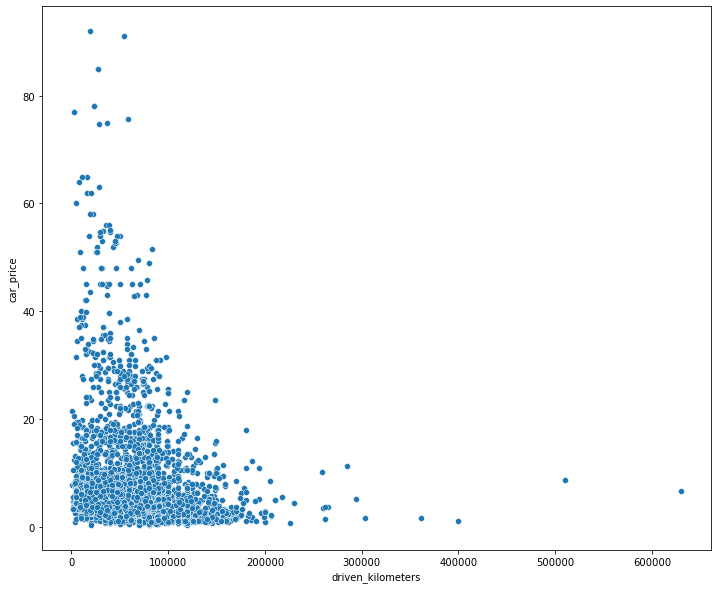

In [175]:
plt.figure(figsize=[12,10])
sns.scatterplot(x='driven_kilometers',y='car_price',data=df2)
plt.show()

From the scatterplot it can be said for most of the records the driven kilometer lies in the range of 30000 to 100000 kms.
There are only few records where the driven kilometer is more than 300000 kms.
As such no relationship can be established between features driven_kilometers and car_price.

{'bodies': [<matplotlib.collections.PolyCollection at 0x1440183e640>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1440183e460>,
 'cmins': <matplotlib.collections.LineCollection at 0x1440183e8b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1440183ea90>}

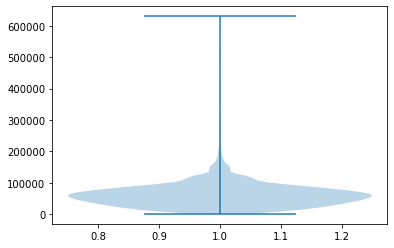

In [177]:
plt.violinplot(df2['driven_kilometers'])

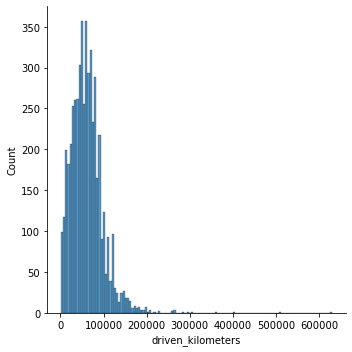

In [178]:
sns.displot(df2['driven_kilometers'])

The area where the maximum density of the records are concentrated are from 30000 to 100000 driven kilometers as confirmed from distribution and violinplot.

In [179]:
df2['owners'].value_counts()

First     2913
Second    1050
1st        684
Third      197
2nd        123
-           69
Fourth      39
Test        15
3rd          1
Name: owners, dtype: int64

The maximum recordsi.e 57%(2913 out of 5091) for the used cars which are available for selling are first owners amd the least records are for 3rd owners.

The -(dash) appearing in the feature owners is replaced by the mode of the feature which is 'first' in this case.

In [181]:
df2['owners']=df2['owners'].replace('-','First')

In [182]:
df2['owners'].value_counts()

First     2982
Second    1050
1st        684
Third      197
2nd        123
Fourth      39
Test        15
3rd          1
Name: owners, dtype: int64

In [183]:
df2.describe()

driven_kilometers    car_price
count        5091.000000  5091.000000
mean        61150.632685     7.084958
std         36918.250591     8.076876
min          1000.000000     0.300000
25%         35849.000000     3.210000
50%         58001.000000     4.850000
75%         80000.000000     7.500000
max        630000.000000    92.000000

There is a hugh difference between 75 % and the max for the feature driven_kilometers chances are there outliers might be there which needs to be confirmed using boxplot.

The feature driven_kilometers is having right tailed skewness as the mean is greater than median.

{'whiskers': [<matplotlib.lines.Line2D at 0x14401ac7790>,
 'caps': [<matplotlib.lines.Line2D at 0x14401ac7e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x14401ac7430>],
 'medians': [<matplotlib.lines.Line2D at 0x14401ad3550>],
 'fliers': [<matplotlib.lines.Line2D at 0x14401ad38b0>],
 'means': []}

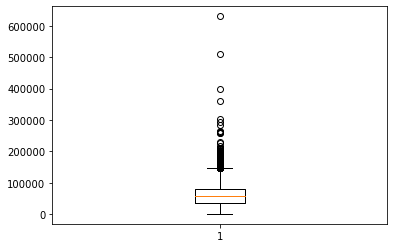

In [185]:
plt.boxplot(df2['driven_kilometers'])

From the boxplot it can be said that there are outliers present in the feature driven_kilometers.

In [191]:
df3=df2.copy()

In [199]:
Q1=df3['driven_kilometers'].quantile(0.25)
Q3=df3['driven_kilometers'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-(1.5*IQR)
upper_boundary=Q3+(1.5*IQR)
print(Q1,Q3,IQR)
print(upper_boundary)
df3['driven_kilometers']=df3['driven_kilometers'].astype('float')
df3['driven_kilometers'].values[df3['driven_kilometers']>upper_boundary]=np.nan

35849.0 80000.0 44151.0
146226.5


In [201]:
df3['driven_kilometers']=df3['driven_kilometers'].fillna(df3['driven_kilometers'].median())

Have treated outliers in feature driven_kilometers using IQR method and replacing it with the median of the respective feature.

In [202]:
df3.skew()

manufacturing year   -0.682753
driven_kilometers     0.364425
car_price             4.302707
dtype: float64

As the indepenedent features are having skewness less than 0.5 there is no need to treat them.

In [203]:
df3['manufacturing year']=df3['manufacturing year'].astype('int')

In [205]:
df3.dtypes

variant                object
fuel                   object
location               object
Brand                  object
model                  object
manufacturing year      int32
driven_kilometers     float64
owners                 object
car_price             float64
dtype: object

<AxesSubplot:>

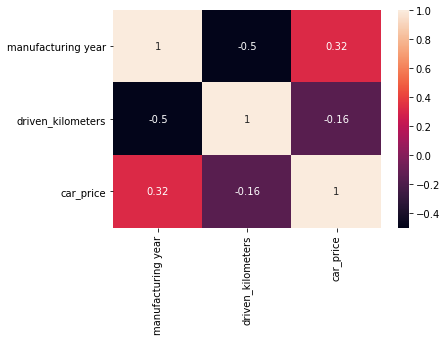

In [206]:
sns.heatmap(df3.corr(),annot=True)

There is a less correlation between car_price and driven kilometer. Further, the less correlated values can be dropped but is always a wise decision not to drop the values with less correlation as it will result into data loss.

So i am not dropping any of the features based on the correlation.

In [211]:
from sklearn.preprocessing import LabelEncoder
for i in df3.columns:
    if df3[i].dtypes=='object':
        le=LabelEncoder()
        df3[i]=le.fit_transform(df3[i].values.reshape(-1,1))

In [212]:
df3

variant  fuel  location  Brand  model  manufacturing year  \
0           1     3         6     17    158                2008   
1           1     3         6      9    204                2011   
2           1     1         6     16    160                2015   
3           1     1         6     16    195                2014   
4           1     1         6     25    132                2013   
5           0     3         6     21    109                2017   
6           0     3         6     28    172                2011   
7           1     3         6      8     28                2014   
8           1     3         6      9     53                2015   
9           1     3         6     28    172                2011   
10          1     3         6     25     65                2013   
11          1     1         6     28    124                2014   
12          1     1         6     16    195                2021   
13          1     3         6      9    204                2009   
14          0     1         6      0      8                2011   
15          1     1        11     16    195                2012   
16          0     3        11      8     90                2016   
17          1     1        11      9     49                2017   
18          1     3        11     26    107                2010   
19          1     3        11      9    176                2013   
20          0     3        11      7     54                2013   
21          1     3        11     17    180                2009   
22          1     0        11     17    180                2013   
23          1     3        11      9    204                2012   
24          1     3        11      8    110                2014   
25          1     1        11      8     15                2014   
26          1     1        11      9    176                2012   
27          0     3        11      8     42                2017   
28          1     3        11     17    201                2007   
29          1     1        11     24    147                2013   
30          1     1        11     17    178                2018   
31          1     1        11     17     41                2017   
32          0     1        11     17    158                2018   
33          1     1        11      9    204                2015   
34          1     3        11      8     42                2015   
35          1     3        11     17    158                2021   
36          1     3        11      4    133                2016   
37          0     3        11      9    174                2019   
38          1     1        11     16    195                2017   
39          1     1        11     27     89                2015   
40          1     3        11      8     28                2013   
41          0     1        11      9     49                2016   
42          0     3        11     12    149                2019   
43          0     3        11      8     42                2016   
44          0     3        11      7     55                2015   
45          1     1        11     17     60                2018   
46          1     1        11     17    158                2015   
47          1     0        11     17    180                2012   
48          1     1        11     17    142                2015   
49          0     3        11     25    132                2013   
50          1     1        11      9    204                2018   
51          1     3        11      8     22                2017   
52          1     3        11     17    180                2009   
53          0     3        11      8     42                2014   
54          1     3        11      9     79                2013   
55          0     3        11      8     90                2016   
56          1     3        11     17    180                2016   
57          0     3        11      8     42                2011   
58          1     0        11     17    180          

Applied label encoder and converted the categorical columns into nuemrical type

In [215]:
x=df3.drop('car_price',axis=1)
y=df3['car_price']

Splitting the data into x and y

In [216]:
x

variant  fuel  location  Brand  model  manufacturing year  \
0           1     3         6     17    158                2008   
1           1     3         6      9    204                2011   
2           1     1         6     16    160                2015   
3           1     1         6     16    195                2014   
4           1     1         6     25    132                2013   
5           0     3         6     21    109                2017   
6           0     3         6     28    172                2011   
7           1     3         6      8     28                2014   
8           1     3         6      9     53                2015   
9           1     3         6     28    172                2011   
10          1     3         6     25     65                2013   
11          1     1         6     28    124                2014   
12          1     1         6     16    195                2021   
13          1     3         6      9    204                2009   
14          0     1         6      0      8                2011   
15          1     1        11     16    195                2012   
16          0     3        11      8     90                2016   
17          1     1        11      9     49                2017   
18          1     3        11     26    107                2010   
19          1     3        11      9    176                2013   
20          0     3        11      7     54                2013   
21          1     3        11     17    180                2009   
22          1     0        11     17    180                2013   
23          1     3        11      9    204                2012   
24          1     3        11      8    110                2014   
25          1     1        11      8     15                2014   
26          1     1        11      9    176                2012   
27          0     3        11      8     42                2017   
28          1     3        11     17    201                2007   
29          1     1        11     24    147                2013   
30          1     1        11     17    178                2018   
31          1     1        11     17     41                2017   
32          0     1        11     17    158                2018   
33          1     1        11      9    204                2015   
34          1     3        11      8     42                2015   
35          1     3        11     17    158                2021   
36          1     3        11      4    133                2016   
37          0     3        11      9    174                2019   
38          1     1        11     16    195                2017   
39          1     1        11     27     89                2015   
40          1     3        11      8     28                2013   
41          0     1        11      9     49                2016   
42          0     3        11     12    149                2019   
43          0     3        11      8     42                2016   
44          0     3        11      7     55                2015   
45          1     1        11     17     60                2018   
46          1     1        11     17    158                2015   
47          1     0        11     17    180                2012   
48          1     1        11     17    142                2015   
49          0     3        11     25    132                2013   
50          1     1        11      9    204                2018   
51          1     3        11      8     22                2017   
52          1     3        11     17    180                2009   
53          0     3        11      8     42                2014   
54          1     3        11      9     79                2013   
55          0     3        11      8     90                2016   
56          1     3        11     17    180                2016   
57          0     3        11      8     42                2011   
58          1     0        11     17    180          

In [217]:
se=StandardScaler()
x=se.fit_transform(x)

Applied Standard scaler before going for train_test_split

In [224]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

# Machine Learning

In [225]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

3.4062178922780038
49.70689644957138
7.050311798039246
0.35522291122641736


In [226]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred1=dt.predict(x_test)
print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_squared_error(y_test,pred1)))
print(r2_score(y_test,pred1))

1.8121099116781159
26.652440726202155
5.16260019042751
0.654275676664193


In [232]:
svr=SVR()
svr.fit(x_train,y_train)
pred2=svr.predict(x_test)
print(mean_absolute_error(y_test,pred2))
print(mean_squared_error(y_test,pred2))
print(np.sqrt(mean_squared_error(y_test,pred2)))
print(r2_score(y_test,pred2))

2.3495438727956444
45.70207007894262
6.760330619055744
0.40717184533292305


In [233]:
kvr=KNeighborsRegressor()
kvr.fit(x_train,y_train)
pred3=kvr.predict(x_test)
print(mean_absolute_error(y_test,pred3))
print(mean_squared_error(y_test,pred3))
print(np.sqrt(mean_squared_error(y_test,pred3)))
print(r2_score(y_test,pred3))

2.421668302257115
40.80985345632973
6.3882590317182455
0.4706316349574524


In [234]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
pred4=ada.predict(x_test)
print(mean_absolute_error(y_test,pred4))
print(mean_squared_error(y_test,pred4))
print(np.sqrt(mean_squared_error(y_test,pred4)))
print(r2_score(y_test,pred4))

5.46707199664795
54.83735668510778
7.405224958440343
0.2886727250144534


In [235]:
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred5=gr.predict(x_test)
print(mean_absolute_error(y_test,pred5))
print(mean_squared_error(y_test,pred5))
print(np.sqrt(mean_squared_error(y_test,pred5)))
print(r2_score(y_test,pred5))

2.036487458239566
25.259146002742185
5.0258477894522615
0.6723489135742367


In [236]:
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
pred6=rfc.predict(x_test)
print(mean_absolute_error(y_test,pred6))
print(mean_squared_error(y_test,pred6))
print(np.sqrt(mean_squared_error(y_test,pred6)))
print(r2_score(y_test,pred6))

1.5591617295200713
23.00509413093242
4.796362593771703
0.7015875325116432


In [237]:
from sklearn.linear_model import Lasso, Ridge
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred7=ls.predict(x_test)
print(mean_absolute_error(y_test,pred7))
print(mean_squared_error(y_test,pred7))
print(np.sqrt(mean_squared_error(y_test,pred7)))
print(r2_score(y_test,pred7))

3.405340123566653
49.7075950676387
7.050361343054602
0.35521384904479303


In [238]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
pred8=rd.predict(x_test)
print(mean_absolute_error(y_test,pred8))
print(mean_squared_error(y_test,pred8))
print(np.sqrt(mean_squared_error(y_test,pred8)))
print(r2_score(y_test,pred8))

3.4062175662085505
49.706896943699114
7.050311833082215
0.35522290481679897


In [239]:
from sklearn.model_selection import cross_val_score

In [241]:
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.3613570203934705


In [243]:
score1=cross_val_score(dt,x,y,cv=5)
print(score1.mean())

0.4637798656520797


In [244]:
score2=cross_val_score(svr,x,y,cv=5)
print(score2.mean())

0.49237115165496964


In [245]:
score3=cross_val_score(kvr,x,y,cv=5)
print(score3.mean())

0.48677647619780917


In [246]:
score4=cross_val_score(ada,x,y,cv=5)
print(score4.mean())

0.21438146703845212


In [247]:
score5=cross_val_score(gr,x,y,cv=5)
print(score5.mean())

0.679297616318818


In [248]:
score6=cross_val_score(rfc,x,y,cv=5)
print(score6.mean())

0.7046873990771002


In [249]:
score7=cross_val_score(ls,x,y,cv=5)
print(score7.mean())

0.36140998906472904


In [250]:
score8=cross_val_score(rd,x,y,cv=5)
print(score8.mean())

0.36135705170530097


The difference between r2_score and cross_val_score is minimum for Linear Regression,Gradient Boosting Regressor,Random Forest Regressor, Lasso and ridge.

# So to find the best model Hypertuning of parameters is required 

# Hypertuning

In [251]:
from sklearn.model_selection import RandomizedSearchCV

In [252]:
LinearRegression?

In [253]:
params1={'fit_intercept':['True','False']}

In [257]:
re=RandomizedSearchCV(lr,param_distributions=params1,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'fit_intercept': 'True'}

In [268]:
lr1=LinearRegression(fit_intercept=True)
lr1.fit(x_train,y_train)
pred9=lr1.predict(x_test)
print(mean_absolute_error(y_test,pred9))
print(mean_squared_error(y_test,pred9))
print(np.sqrt(mean_squared_error(y_test,pred9)))
print(r2_score(y_test,pred9))

3.4062178922780038
49.70689644957138
7.050311798039246
0.35522291122641736


In [259]:
GradientBoostingRegressor?

In [260]:
params2={'loss':['ls', 'lad', 'huber', 'quantile'],'learning_rate':[0.1,0.001,0.0001,1],'n_estimators':[100,200,300],'criterion':['friedman_mse', 'mse', 'mae']}

In [262]:
re1=RandomizedSearchCV(gr,param_distributions=params2,n_jobs=-1,cv=5)
re1.fit(x_train,y_train)
re1.best_params_

{'n_estimators': 100, 'loss': 'huber', 'learning_rate': 1, 'criterion': 'mse'}

In [269]:
gr1=GradientBoostingRegressor(loss='huber',learning_rate=1,n_estimators=100,criterion='mse')
gr1.fit(x_train,y_train)
pred10=gr1.predict(x_test)
print(mean_absolute_error(y_test,pred10))
print(mean_squared_error(y_test,pred10))
print(np.sqrt(mean_squared_error(y_test,pred10)))
print(r2_score(y_test,pred10))

1.5057373877583562
14.357996177503072
3.789194660808952
0.8137540736355411


In [266]:
params3={'n_estimators':[100,200,300,400],'criterion':[ 'mse', 'mae'],'max_depth':np.arange(1,10),'random_state':np.arange(1,100)}

In [267]:
re2=RandomizedSearchCV(rfc,param_distributions=params3,n_jobs=-1,cv=5)
re2.fit(x_train,y_train)
re2.best_params_

{'random_state': 48, 'n_estimators': 300, 'max_depth': 6, 'criterion': 'mse'}

In [270]:
rfc1=RandomForestRegressor(n_estimators=300,criterion='mse',max_depth=6,random_state=48)
rfc1.fit(x_train,y_train)
pred11=rfc1.predict(x_test)
print(mean_absolute_error(y_test,pred11))
print(mean_squared_error(y_test,pred11))
print(np.sqrt(mean_squared_error(y_test,pred11)))
print(r2_score(y_test,pred11))

2.2430866983848987
29.808839395930367
5.459747191576764
0.6133321921450803


In [272]:
params4={'fit_intercept':['True','False',],'alpha':[0.1,0.001,0.001,1],'random_state':np.arange(1,100)}

In [273]:
re3=RandomizedSearchCV(ls,param_distributions=params4,n_jobs=-1,cv=5)
re3.fit(x_train,y_train)
re3.best_params_

{'random_state': 69, 'fit_intercept': 'False', 'alpha': 0.001}

In [274]:
ls1=Lasso(alpha=0.001,fit_intercept='false',random_state=69)
ls1.fit(x_train,y_train)
pred12=ls1.predict(x_test)
print(mean_absolute_error(y_test,pred12))
print(mean_squared_error(y_test,pred12))
print(np.sqrt(mean_squared_error(y_test,pred12)))
print(r2_score(y_test,pred12))

3.405340123566653
49.7075950676387
7.050361343054602
0.35521384904479303


In [276]:
params5={'fit_intercept':['True','False',],'alpha':[0.1,0.001,0.001,1],'random_state':np.arange(1,100)}

In [277]:
re4=RandomizedSearchCV(rd,param_distributions=params5,n_jobs=-1,cv=5)
re4.fit(x_train,y_train)
re4.best_params_

{'random_state': 95, 'fit_intercept': 'False', 'alpha': 1}

In [278]:
rd1=Ridge(alpha=1,fit_intercept='false',random_state=95)
rd1.fit(x_train,y_train)
pred13=rd1.predict(x_test)
print(mean_absolute_error(y_test,pred13))
print(mean_squared_error(y_test,pred13))
print(np.sqrt(mean_squared_error(y_test,pred13)))
print(r2_score(y_test,pred13))

3.4058919047696015
49.70739159787322
7.0503469132996015
0.355216488369563


# Based on the hypertuning Gradient Boosting Regressor is my best model with r2_score of 81%

Text(0.5, 1.0, 'Gradient Boosting Regressor')

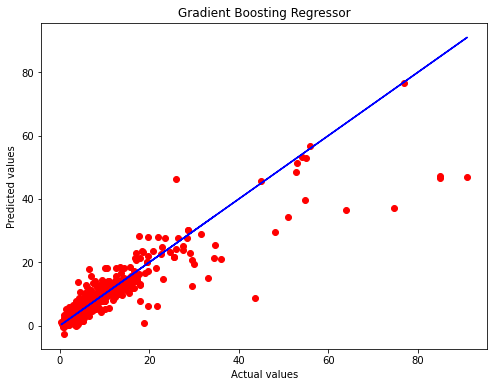

In [279]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred10,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Gradient Boosting Regressor")

In [280]:
import joblib

In [281]:
joblib.dump(gr1,'carpriceprediction.obj')

['carpriceprediction.obj']

In [282]:
joblib.load('carpriceprediction.obj')

GradientBoostingRegressor(criterion='mse', learning_rate=1, loss='huber')